# Pipeline

This pipeline is intended to simplify to whole process of loading a dataset, creating gaps of different types in it, imputing the missing data and evaluating the imputation method.
You may want to edit the cells preceded by an <span style="color: red">**EDIT:**</span> sign to fit your needs.

## Install dependencies

In [10]:
!pip install openpyxl > /dev/null 2>&1
!pip install jupyterlab-widgets > /dev/null 2>&1
!pip install jsfileupload > /dev/null 2>&1
!pip install pyxlsb > /dev/null 2>&1
!pip install sklearn > /dev/null 2>&1
!pip install scipy > /dev/null 2>&1
!pip install scikit_learn > /dev/null 2>&1
!pip install missingpy > /dev/null 2>&1
!pip install fancyimpute > /dev/null 2>&1

## Load clean data

> The upload form only supports files up to 10Mo. For larger files, please upload them directly to JupyterHub and provide a relative link to them in the text input herebelow.

In [1]:
%run helpers/load_data.ipynb

config_select.value = "factory zero"
file_select.value = "054.xlsx"
# dfloader.add_index_as_feature('Date')
# dfloader.add_targets('flow_temp', sheet_name='alklimaHeatPump')
# dfloader.add_targets('op_mode', sheet_name='alklimaHeatPump')
# dfloader.add_targets('power', sheet_name='smartMeter')
dfloader.add_features('co2', sheet_name='co2sensor')
dfloader.add_targets('co2', sheet_name='co2sensor')

# config_select.value = "knmi"
# file_select.value = "260 De Bilt.csv"
# dfloader.add_targets('Relative atmospheric humidity')
# dfloader.add_targets('radiation')
# dfloader.add_targets('temperature')


Dropdown(description='Config:', options=('factory zero', 'knmi'), value='factory zero')

In [2]:
df = dfloader.df
orig_size = len(df)
df = df.dropna(subset=dfloader.features)
size_after_drop = len(df)
print(f'Dropping {orig_size - size_after_drop} rows (NaN values in features)')
df.head()

Dropping 0 rows (NaN values in features)


,co2sensor_co2
Timestamp,
2018-12-31 23:05:00,387.7
2018-12-31 23:10:00,388.0
2018-12-31 23:15:00,389.5
2018-12-31 23:20:00,387.2
2018-12-31 23:25:00,387.6


In [3]:
# Only run this for faster testing
df = df.head(10000)

## Set an arbitrary random state

In [4]:
import random
random_state = 0
random.seed(random_state)

## Create gaps of different sizes

In [5]:
%run helpers/create_gaps.ipynb

HTML(value='')

## Run the imputation

In [10]:
%run helpers/impute.ipynb

Dropdown(description='Imputer:', options=('median imputation', 'mode imputation', 'mean imputation', 'fillna',…

HTML(value='')

Text(value='', continuous_update=False)

Button(description='Confirm selection', style=ButtonStyle())

  0%|          | 0/9987 [00:00<?, ?it/s]

  0%|          | 0/9987 [00:00<?, ?it/s]

  0%|          | 0/9987 [00:00<?, ?it/s]

  0%|          | 0/9987 [00:00<?, ?it/s]

  0%|          | 0/9987 [00:00<?, ?it/s]

## Evaluate the imputation results

,Mean squared error,Raw bias,Absolute bias,Percent bias,Errors sum,Mean minimum error,Mean maximum error,Maximum error,Variance error sum,Average variance error,...,Median error sum,Average median error,Method,Gap type,Gap count,Random state,Target field,Date,File,Imputer config
RNN - co2sensor_co2 - gap type 1 - 2022-01-09 17:53:00,1551.530,-0.510,21.536,0.091,28707.553,-1.782,3.924,291.872,93402.092,343.390,...,4605.701,16.933,RNN,1 [0:05:00-1:00:00],272,0,co2sensor_co2,2022-01-09 17:53:00,054.xlsx,"{""random_state"": 0, ""input_window_size"": 12, ""..."
RNN - co2sensor_co2 - gap type 2 - 2022-01-09 17:53:00,5701.517,-5.334,52.311,0.953,95520.606,-0.974,58.392,334.032,82194.134,1347.445,...,2723.012,44.640,RNN,2 [1:00:00-6:00:00],61,0,co2sensor_co2,2022-01-09 17:53:00,054.xlsx,"{""random_state"": 0, ""input_window_size"": 12, ""..."
RNN - co2sensor_co2 - gap type 3 - 2022-01-09 17:53:00,8344.163,-33.474,71.351,6.387,96895.291,-0.884,28.327,335.162,43198.470,4799.830,...,579.181,64.353,RNN,"3 [6:00:00-1 day, 0:00:00]",9,0,co2sensor_co2,2022-01-09 17:53:00,054.xlsx,"{""random_state"": 0, ""input_window_size"": 12, ""..."
RNN - co2sensor_co2 - gap type 4 - 2022-01-09 17:53:00,10932.922,-14.882,79.777,2.632,165378.660,-10.713,206.706,513.226,43636.992,8727.398,...,270.802,54.160,RNN,"4 [1 day, 0:00:00-3 days, 0:00:00]",5,0,co2sensor_co2,2022-01-09 17:53:00,054.xlsx,"{""random_state"": 0, ""input_window_size"": 12, ""..."
RNN - co2sensor_co2 - gap type 5 - 2022-01-09 17:53:00,24551.204,40.488,100.547,-6.676,251366.967,-40.839,949.110,949.112,35971.061,17985.531,...,42.935,21.467,RNN,"5 [3 days, 0:00:00-7 days, 0:00:00]",2,0,co2sensor_co2,2022-01-09 17:53:00,054.xlsx,"{""random_state"": 0, ""input_window_size"": 12, ""..."


<IPython.core.display.Javascript object>


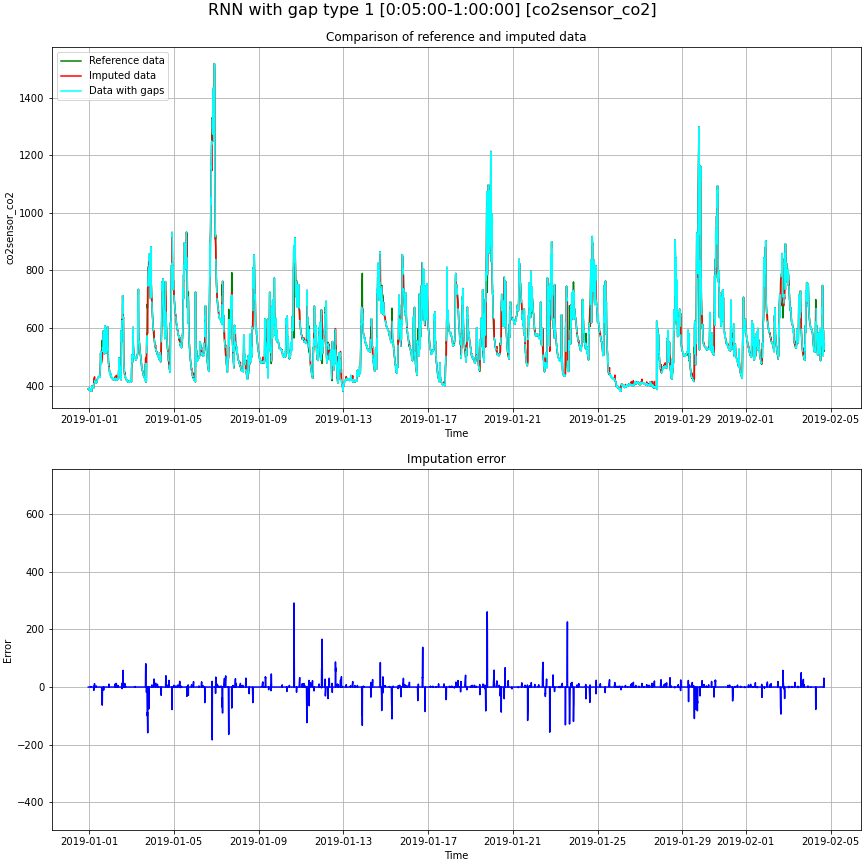

<IPython.core.display.Javascript object>


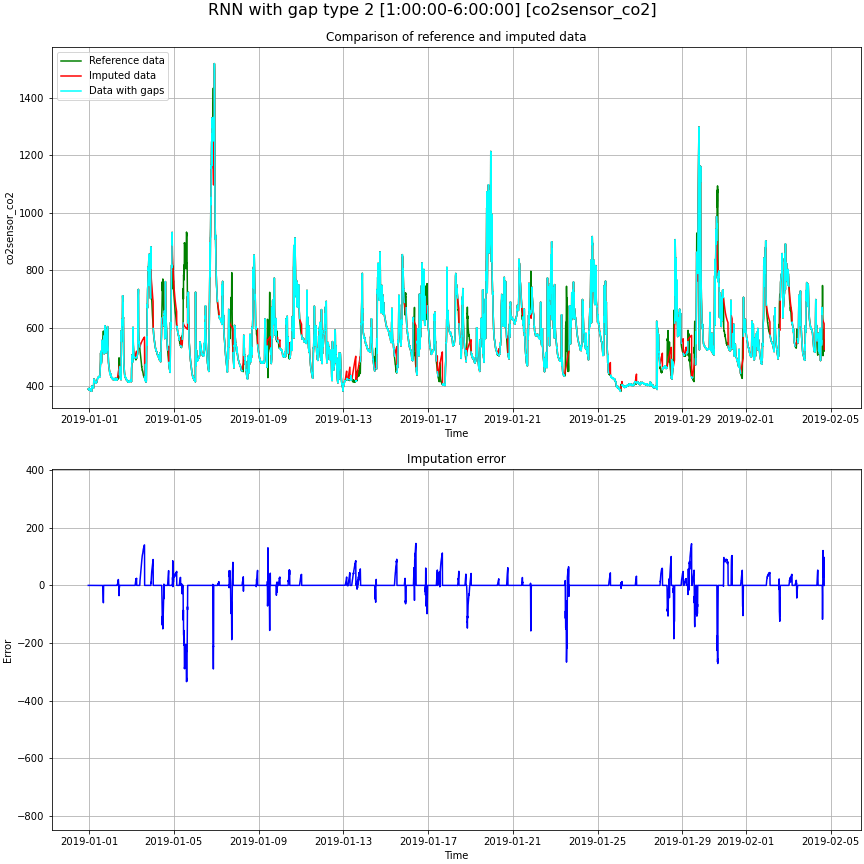

<IPython.core.display.Javascript object>


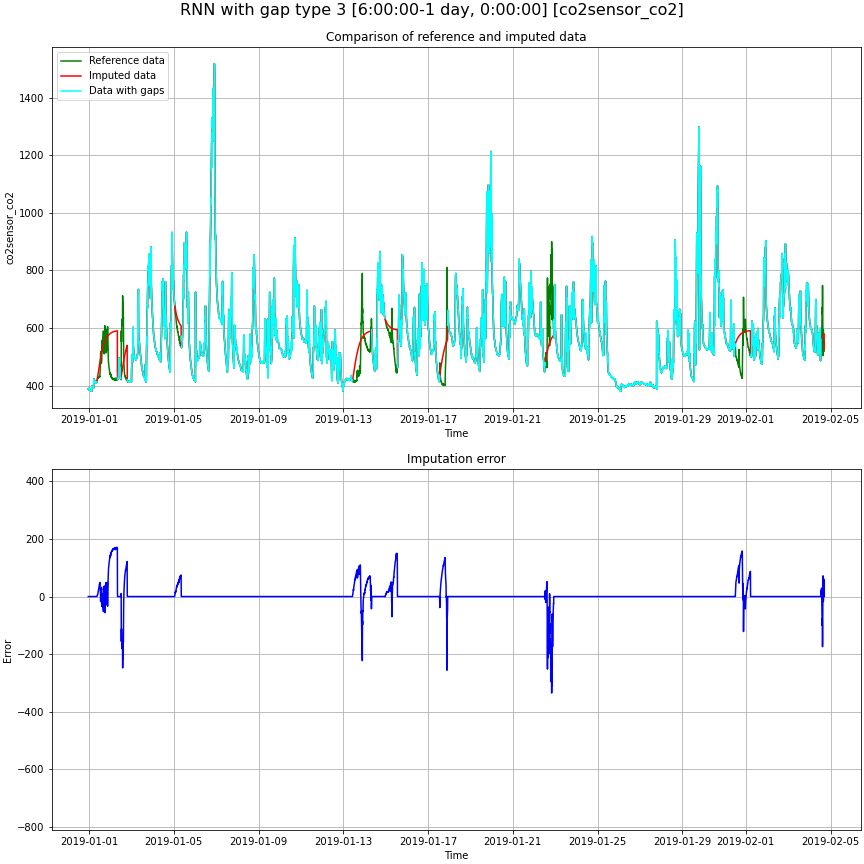

<IPython.core.display.Javascript object>


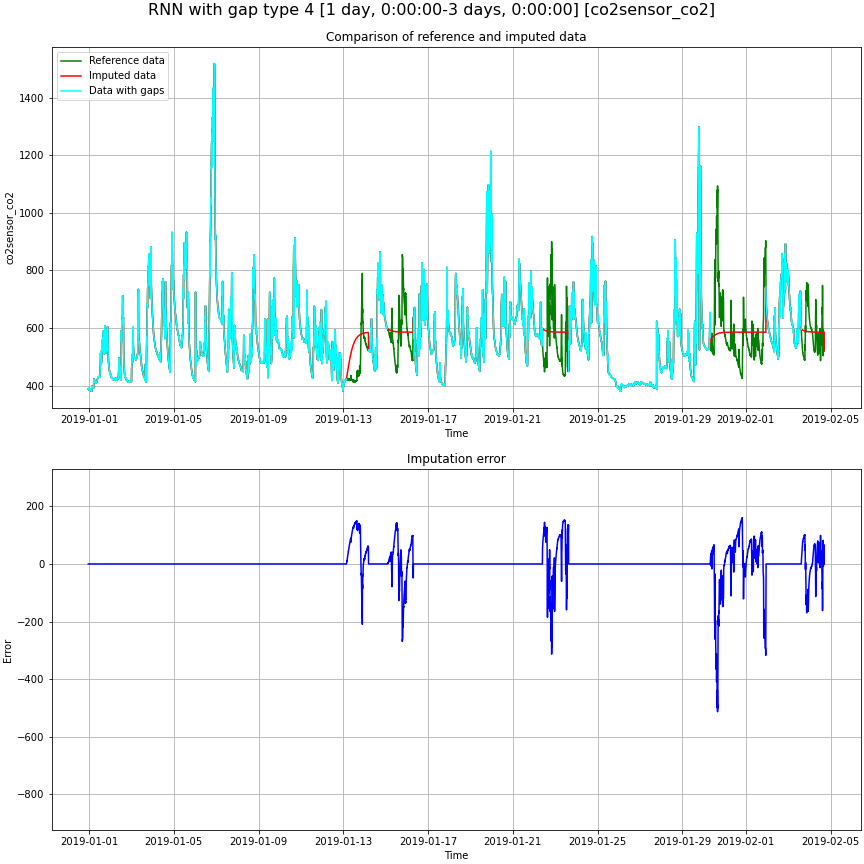

<IPython.core.display.Javascript object>


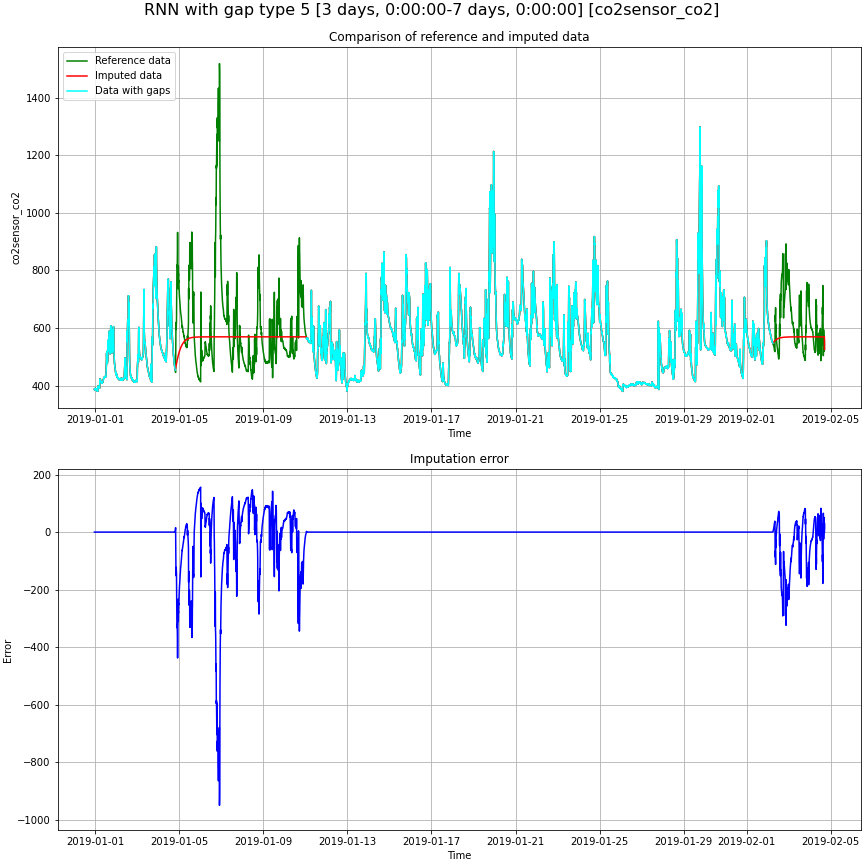

In [11]:
%run helpers/evaluate.ipynb

In [12]:
%run helpers/saving.ipynb

Button(description='Save evaluation results', layout=Layout(width='20%'), style=ButtonStyle())

Button(description='Save results in sub-folder', layout=Layout(width='20%'), style=ButtonStyle())